# Geospatial Analysis

In [1]:
import geopandas as gpd
import pandas as pd

import numpy as np
import math

from shapely.geometry import LineString, MultiPolygon

import folium # For interactive maps
from folium import Choropleth, Circle, Marker, GeoJson
from folium.plugins import HeatMap, MarkerCluster

from geopy.geocoders import Nominatim # For Geocoding: [`Nominatim`](https://nominatim.openstreetmap.org/) refers to the geocoding software that will be used to generate locations. 
# from learntools.geospatial.tools import Nominatim # Just for this exercise

import warnings 
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


# Geospatial Datasets:
## Kaggle:
* Dataset tracking major motor vehicle collisions in 2013-2018 in New York City:
 * "../input/geospatial-learn-course-data/NYPD_Motor_Vehicle_Collisions/NYPD_Motor_Vehicle_Collisions/NYPD_Motor_Vehicle_Collisions.shp"
* Hospital data in New York City:
 * "../input/geospatial-learn-course-data/nyu_2451_34494/nyu_2451_34494/nyu_2451_34494.shp"
* Information about forests, wilderness areas, and other lands under the care of the [Department of Environmental Conservation](https://www.dec.ny.gov/index.html) in the state of New York:
 * "../input/geospatial-learn-course-data/DEC_lands/DEC_lands/DEC_lands.shp" 
* Campsites in New York state:
 * "../input/geospatial-learn-course-data/DEC_pointsinterest/DEC_pointsinterest/Decptsofinterest.shp"
* Foot trails in New York state:
 * "../input/geospatial-learn-course-data/DEC_roadstrails/DEC_roadstrails/Decroadstrails.shp"
* County boundaries in New York state:
 * "../input/geospatial-learn-course-data/NY_county_boundaries/NY_county_boundaries/NY_county_boundaries.shp"
* Kiva loans ([Kiva.org](https://www.kiva.org/) is an online crowdfunding platform extending financial services to poor people around the world):
 * "../input/geospatial-learn-course-data/kiva_loans/kiva_loans/kiva_loans.shp"
* Regions in Ghana:
 * "../input/geospatial-learn-course-data/ghana/ghana/Regions/Map_of_Regions_in_Ghana.shp"
* Island boundaries:
 * "../input/geospatial-learn-course-data/Philippines_AL258.kml"
* Boston police districts:
 * '../input/geospatial-learn-course-data/Police_Districts/Police_Districts/Police_Districts.shp'
* Global Plate boundaries:
 * "../input/geospatial-learn-course-data/Plate_Boundaries/Plate_Boundaries/Plate_Boundaries.shp"
* Japanese prefectures:
 * "../input/geospatial-learn-course-data/japan-prefecture-boundaries/japan-prefecture-boundaries/japan-prefecture-boundaries.shp"
* Dataset from the US Environmental Protection Agency (EPA) that tracks releases of toxic chemicals in Philadelphia, Pennsylvania, USA:
 * "../input/geospatial-learn-course-data/toxic_release_pennsylvania/toxic_release_pennsylvania/toxic_release_pennsylvania.shp"
* Dataset that contains readings from air quality monitoring stations in Philadelphia, Pennsylvania, USA:
 * "../input/geospatial-learn-course-data/PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations.shp"
* Protected areas:
 * "../input/geospatial-learn-course-data/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile-polygons.shp"
* Name, area (in square kilometers), a unique id ("GEOID"), and boundaries ("geometry") for each county in the state of California:
 * "../input/geospatial-learn-course-data/CA_county_boundaries/CA_county_boundaries/CA_county_boundaries.shp"
 

## GeoPandas:
* Country boundaries in the world:
 * 'naturalearth_lowres' 

### 1) Get the data.
geospatial file formats (can be read by `gpd.read_file()`:
* [shapefile](https://en.wikipedia.org/wiki/Shapefile) (most common file type)
* [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON)
* [KML](https://en.wikipedia.org/wiki/Keyhole_Markup_Language)
* [GPKG](https://en.wikipedia.org/wiki/GeoPackage)

Use the next cell to load the shapefile located at `loans_filepath` to create a GeoDataFrame `world_loans`.  

In [2]:
loans_filepath = "../input/geospatial-learn-course-data/kiva_loans/kiva_loans/kiva_loans.shp"

# Your code here: Load the data
world_loans = gpd.read_file(loans_filepath)

world_loans.head()

Partner ID                       Field Part                       sector  \
0           9  KREDIT Microfinance Institution  General Financial Inclusion   
1           9  KREDIT Microfinance Institution  General Financial Inclusion   
2           9  KREDIT Microfinance Institution  General Financial Inclusion   
3           9  KREDIT Microfinance Institution  General Financial Inclusion   
4           9  KREDIT Microfinance Institution  General Financial Inclusion   

               Loan Theme   country  amount                    geometry  
0        Higher Education  Cambodia     450  POINT (102.89751 13.66726)  
1  Vulnerable Populations  Cambodia   20275  POINT (102.98962 13.02870)  
2        Higher Education  Cambodia    9150  POINT (102.98962 13.02870)  
3  Vulnerable Populations  Cambodia  604950  POINT (105.31312 12.09829)  
4              Sanitation  Cambodia     275  POINT (105.31312 12.09829)

# ([GeoPandas](https://geopandas.org/en/stable/docs.html)) GeoDataFrame object
Every command/method that you can use with a DataFrame will work with the data read by gpd! This is because the data was loaded into a (GeoPandas) GeoDataFrame object that has all of the capabilities of a (Pandas) DataFrame.

In [3]:
type(world_loans)

geopandas.geodataframe.GeoDataFrame

# Map Projection ([list of map projections](https://bit.ly/2kOHTBs))
* A method to render a three-dimensional globe (>2-dimensional) as a flat (2-dimensional) surface;
* Can't be 100% accurate:
 * the *equal-area* projections (like "Lambert Cylindrical Equal Area", or "Africa Albers Equal Area Conic") preserve area. A good choice to calculate the area of a country or city.
 * the *equidistant* projections (like "Azimuthal Equidistant projection") preserve distance. A good choice to calculate flight distance.
 * "Mercator" projection. This projection preserves angles (good for sea navigation) and slightly distorts area. 
 
 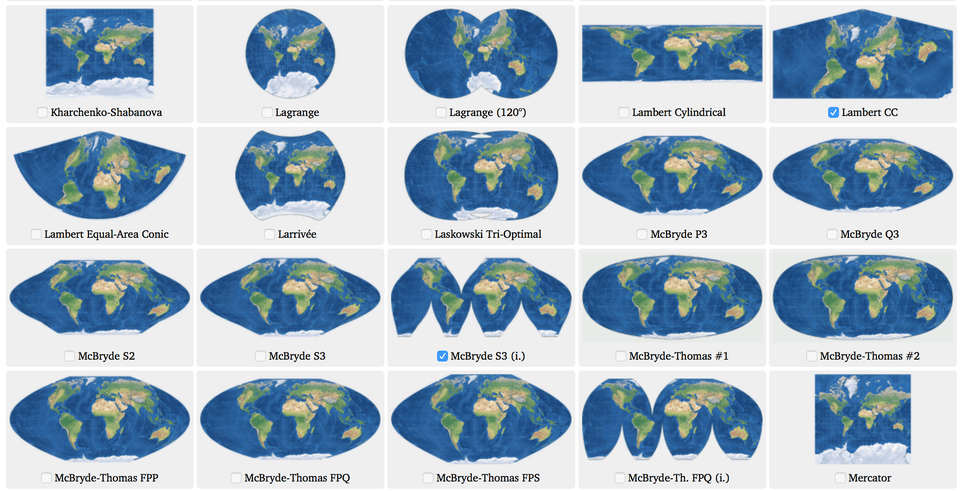

# Coordinate Reference System (CRS)
Shows how the projected points (using the map projection) correspond to real locations on Earth.


In [4]:
# Load a GeoDataFrame containing regions in Ghana
regions = gpd.read_file("../input/geospatial-learn-course-data/ghana/ghana/Regions/Map_of_Regions_in_Ghana.shp")
print(regions.crs)

PROJCS["WGS_1984_UTM_Zone_30N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


## Creating GeoDataFrame and Setting the CRS

When we create a GeoDataFrame from a shapefile, the CRS is already imported for us.

Coordinate reference systems are referenced by [European Petroleum Survey Group (EPSG)](http://www.epsg.org/) codes.

This GeoDataFrame uses [EPSG 32630](https://epsg.io/32630), which is more commonly called the "Mercator" projection.

However, when creating a GeoDataFrame from a CSV file, we have to set the CRS.  [EPSG 4326](https://epsg.io/4326) corresponds to coordinates in latitude and longitude.

In [5]:
# Create a DataFrame with health facilities in Ghana
facilities_df = pd.read_csv("../input/geospatial-learn-course-data/ghana/ghana/health_facilities.csv")

# Convert the DataFrame to a GeoDataFrame
facilities = gpd.GeoDataFrame(facilities_df, geometry=gpd.points_from_xy(facilities_df.Longitude, facilities_df.Latitude))

# Set the coordinate reference system (CRS) to EPSG 4326
facilities.crs = {'init': 'epsg:4326'}

# View the first five rows of the GeoDataFrame
facilities.head()

Region          District             FacilityName           Type  \
0  Ashanti     Offinso North        A.M.E Zion Clinic         Clinic   
1  Ashanti  Bekwai Municipal        Abenkyiman Clinic         Clinic   
2  Ashanti      Adansi North     Aboabo Health Centre  Health Centre   
3  Ashanti     Afigya-Kwabre  Aboabogya Health Centre  Health Centre   
4  Ashanti            Kwabre     Aboaso Health Centre  Health Centre   

           Town   Ownership  Latitude  Longitude                  geometry  
0      Afrancho        CHAG   7.40801   -1.96317  POINT (-1.96317 7.40801)  
1  Anwiankwanta     Private   6.46312   -1.58592  POINT (-1.58592 6.46312)  
2   Aboabo No 2  Government   6.22393   -1.34982  POINT (-1.34982 6.22393)  
3     Aboabogya  Government   6.84177   -1.61098  POINT (-1.61098 6.84177)  
4        Aboaso  Government   6.84177   -1.61098  POINT (-1.61098 6.84177)

# Longitude/Latitude -> Points -> LineString
1. points_gdf = gpd.GeoDataFrame(df, gpd.**points_from_xy**(df.**Longitude**, df.**Latitude**))
1. lineString_df = points_gdf.groupby("identifier")['geometry'].apply(lambda x: **LineString**(List(x))).reset_index()
1. lineString_gdf = gpd.GeoDataFrame(lineString_df, lineString_df.**geometry**)

In [6]:
birds_df = pd.read_csv("../input/geospatial-learn-course-data/purple_martin.csv", parse_dates=['timestamp'])

# Create the GeoDataFrame
birds = gpd.GeoDataFrame(birds_df, geometry=gpd.points_from_xy(birds_df["location-long"], birds_df["location-lat"]))
birds.crs = {'init' :'epsg:4326'}

# GeoDataFrame showing path for each bird
path_df = birds.groupby("tag-local-identifier")['geometry'].apply(list).apply(lambda x: LineString(x)).reset_index()
# path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry)
# path_gdf.crs = {'init' :'epsg:4326'}

# Re-projecting

Re-projecting refers to the process of changing the CRS.  This is done in GeoPandas with the `to_crs()` method of either:
* GeoDataFrame, (modifies only the "geometry" column), i.e., gdf.to_crs(), or
* "geometry" column of the GeoDataFrame, i.e., gdf.geometry.to_crs() 

When plotting multiple GeoDataFrames, it's important that they all use the same CRS.

<AxesSubplot:>

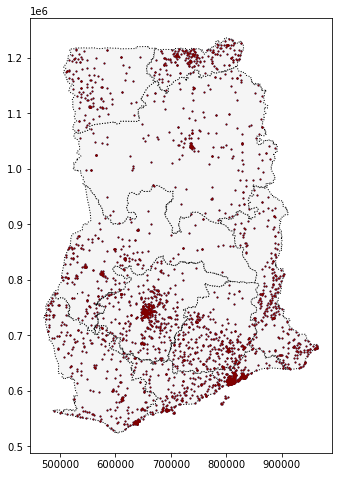

In [7]:
# Create a map
ax = regions.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')
facilities.to_crs(epsg=32630).plot(markersize=1, ax=ax) # OR the following
facilities.geometry.to_crs(epsg=32630).plot(color='maroon', markersize=1, ax=ax)

# Not Available EPSG code 
In case the EPSG code is not available in GeoPandas, we can change the CRS with what's known as the "proj4 string" of the CRS.  For instance, the proj4 string to convert to latitude/longitude coordinates is as follows:
```
+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs
```

In [8]:
# Change the CRS to EPSG 4326
regions.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs").head()

Region                                           geometry
0        Ashanti  POLYGON ((-1.30985 7.62302, -1.30786 7.62198, ...
1    Brong Ahafo  POLYGON ((-2.54567 8.76089, -2.54473 8.76071, ...
2        Central  POLYGON ((-2.06723 6.29473, -2.06658 6.29420, ...
3        Eastern  POLYGON ((-0.21751 7.21009, -0.21747 7.20993, ...
4  Greater Accra  POLYGON ((0.23456 6.10986, 0.23484 6.10974, 0....

### 2) Plot the data.


Run the next code cell without changes to load a GeoDataFrame `world` containing country boundaries.
Every GeoDataFrame contains a special "geometry" column. It contains all of the geometric objects that are displayed when we call the plot() method.

In [9]:
# This dataset is provided in GeoPandas
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

Typical datatypes in the 'geometry' filed of a GeoDataFrame object:
* Point (the epicenter of an earthquake) (`x` and `y` built-in attributes for the x- and y-coordinates)
* LineString (a street) (`length` built-in attribute to get the length)
* Polygon (country boundaries) (`area` built-in attribute to get the area)

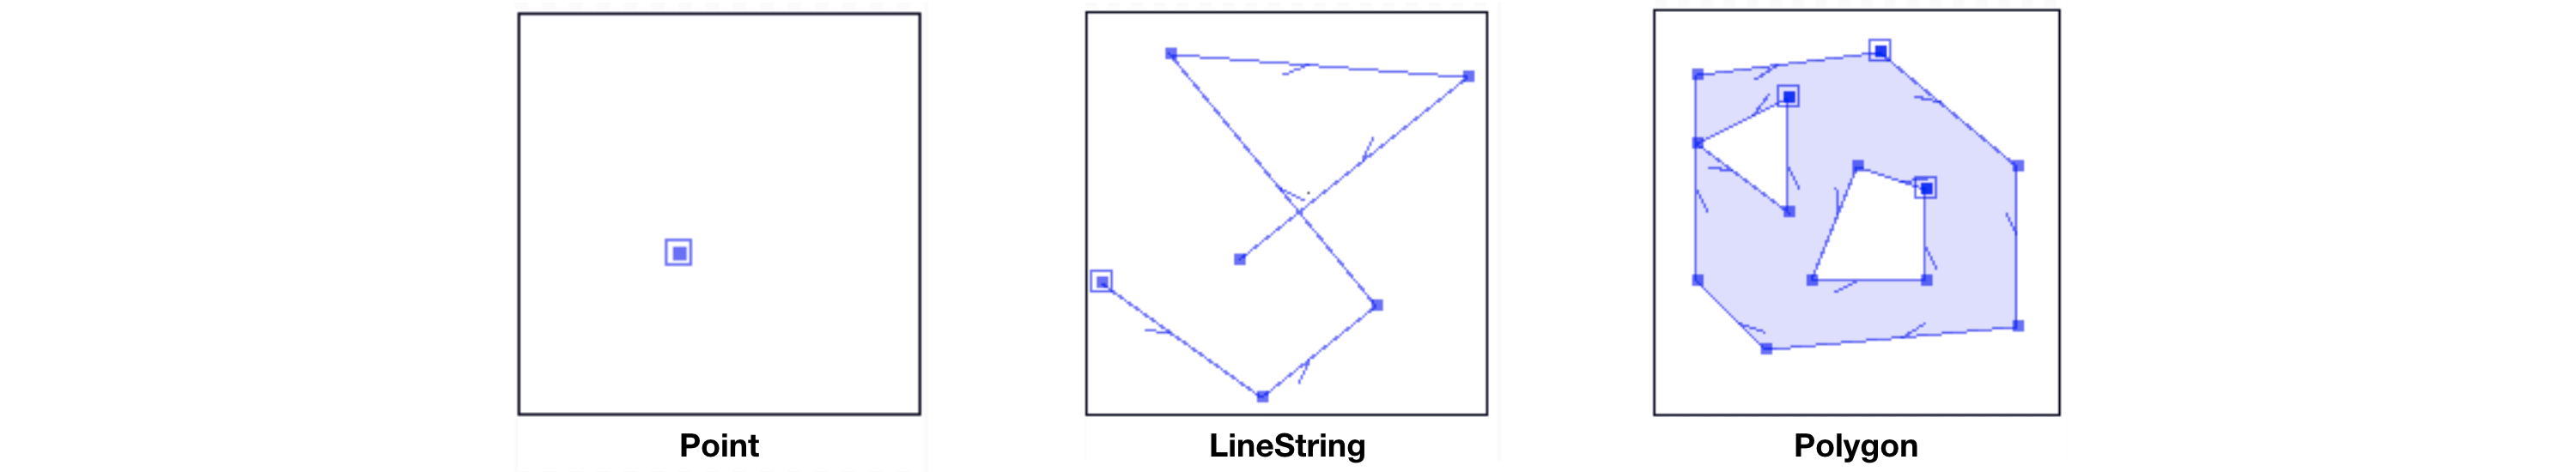

In [10]:
# Get the x-coordinate of each point
facilities.geometry.head().x

# Calculate the area (in square meters) of each polygon in the GeoDataFrame 
regions.loc[:, "AREA"] = regions.geometry.area / 10**6
regions.AREA.sum()

239584.5760055668

# Total Area 
* sum(polygon_gdf.geometry.to_crs(epsg=3035).area) / 10**6

In [11]:
totalArea =  sum(regions.geometry.to_crs(epsg=3035).area) / 10**6 # in square kilometers

Use the `world` and `world_loans` GeoDataFrames to visualize Kiva loan locations across the world.

<AxesSubplot:>

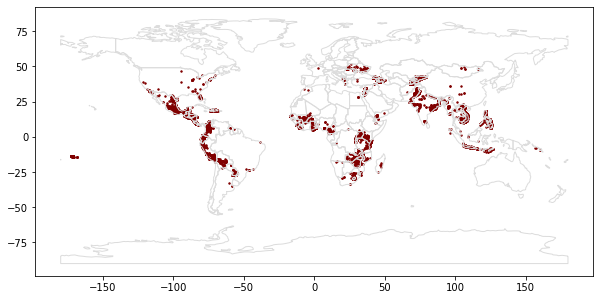

In [12]:
# Your code here
# Define a base map with county boundaries
ax = world.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)

# Add wild lands, campsites, and foot trails to the base map
world_loans.plot(color='maroon', markersize=2, ax=ax)

### 3) Select loans based in the Philippines.

Next, you'll focus on loans that are based in the Philippines.  Use the next code cell to create a GeoDataFrame `PHL_loans` which contains all rows from `world_loans` with loans that are based in the Philippines.

In [13]:
# world_loans.country.value_counts()
PHL_loans = world_loans.loc[world_loans.country == 'Philippines']
# It gets incorrect when adding .copy() at the end

### 4) Understand loans in the Philippines.

Run the next code cell without changes to load a GeoDataFrame `PHL` containing boundaries for all islands in the Philippines.

In [14]:
# Load a KML file containing island boundaries
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file("../input/geospatial-learn-course-data/Philippines_AL258.kml", driver='KML')
PHL.head()

Name Description  \
0  Autonomous Region in Muslim Mindanao               
1                          Bicol Region               
2                        Cagayan Valley               
3                            Calabarzon               
4                                Caraga               

                                            geometry  
0  MULTIPOLYGON (((119.46690 4.58718, 119.46653 4...  
1  MULTIPOLYGON (((124.04577 11.57862, 124.04594 ...  
2  MULTIPOLYGON (((122.51581 17.04436, 122.51568 ...  
3  MULTIPOLYGON (((120.49202 14.05403, 120.49201 ...  
4  MULTIPOLYGON (((126.45401 8.24400, 126.45407 8...

Use the `PHL` and `PHL_loans` GeoDataFrames to visualize loans in the Philippines.

<AxesSubplot:>

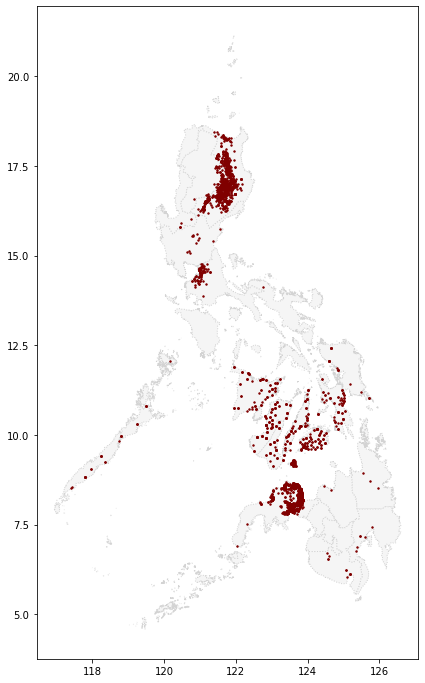

In [15]:
# Define a base map with county boundaries
# ax = PHL.plot(figsize=(10,10), color='none', edgecolor='gainsboro', zorder=3)
ax = PHL.plot(figsize=(12,12), color='whitesmoke', linestyle=':', edgecolor='lightgray')

# Add wild lands, campsites, and foot trails to the base map
PHL_loans.plot(color='maroon', markersize=2, ax=ax)

Can you identify any islands where it might be useful to recruit new Field Partners?  Do any islands currently look outside of Kiva's reach?

You might find [this map](https://bit.ly/2U2G7x7) useful to answer the question.

# Cross-browser Interactive Map Visualisation
The following function ensures that the maps are visible [in all web browsers](https://github.com/python-visualization/folium/issues/812).

In [16]:
def embed_map(m, file_name):
    """m: the variable containing the map, 
    file_name: the name of the HTML file where the map will be saved."""
    
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

# Interactive Map using `folium.Map`

In [17]:
# Create a map
m_1 = folium.Map(location=[42.32,-71.0589], # `location` sets the initial center of the map. We use the latitude (42.32&deg; N) and longitude (-71.0589&deg; E) of the city of Boston.  
                 tiles='openstreetmap', # `tiles` changes the styling of the map; in this case, we choose the [OpenStreetMap](https://www.openstreetmap.org/#map=10/42.32/-71.0589) style. If you're curious, you can find the other options listed [here](https://github.com/python-visualization/folium/tree/master/folium/templates/tiles).
                 zoom_start=10) # `zoom_start` sets the initial level of zoom of the map, where higher values zoom in closer to the map.

# Display the map
m_1

# Coordinates Pop-up Added on the Interactive Map using `folium.LatLngPopup`

In [18]:
# Create a map
m_1 = folium.Map(location=[42.32,-71.0589], # `location` sets the initial center of the map. We use the latitude (42.32&deg; N) and longitude (-71.0589&deg; E) of the city of Boston.  
                 tiles='openstreetmap', # `tiles` changes the styling of the map; in this case, we choose the [OpenStreetMap](https://www.openstreetmap.org/#map=10/42.32/-71.0589) style. If you're curious, you can find the other options listed [here](https://github.com/python-visualization/folium/tree/master/folium/templates/tiles).
                 zoom_start=10) # `zoom_start` sets the initial level of zoom of the map, where higher values zoom in closer to the map.

folium.LatLngPopup().add_to(m_1)

# Display the map
m_1

# Load the Data to be Added on the MAP

In [19]:
# Load the data
crimes = pd.read_csv("../input/geospatial-learn-course-data/crimes-in-boston/crimes-in-boston/crime.csv", encoding='latin-1')

# Drop rows with missing locations
crimes.dropna(subset=['Lat', 'Long', 'DISTRICT'], inplace=True)

# Focus on major crimes in 2018
crimes = crimes[crimes.OFFENSE_CODE_GROUP.isin([
    'Larceny', 'Auto Theft', 'Robbery', 'Larceny From Motor Vehicle', 'Residential Burglary',
    'Simple Assault', 'Harassment', 'Ballistics', 'Aggravated Assault', 'Other Burglary', 
    'Arson', 'Commercial Burglary', 'HOME INVASION', 'Homicide', 'Criminal Harassment', 
    'Manslaughter'])]
crimes = crimes[crimes.YEAR>=2018]

daytime_robberies = crimes[((crimes.OFFENSE_CODE_GROUP == 'Robbery') & \
                            (crimes.HOUR.isin(range(9,18))))] # To reduce the amount of data we need to fit on the map, we'll (temporarily) confine our attention to daytime robberies.

daytime_robberies.head()

INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP    OFFENSE_DESCRIPTION  \
299       I182070598           311            Robbery   ROBBERY - COMMERCIAL   
527       I182070342           381            Robbery  ROBBERY - CAR JACKING   
562       I182070309           361            Robbery        ROBBERY - OTHER   
1127      I182069693           301            Robbery       ROBBERY - STREET   
1135      I182069687           301            Robbery       ROBBERY - STREET   

     DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH  \
299       A15             60      NaN  2018-09-02 17:15:00  2018      9   
527       E18            490      NaN  2018-09-01 17:05:00  2018      9   
562        D4            151      NaN  2018-09-01 15:00:00  2018      9   
1127       A1             74      NaN  2018-08-30 15:24:00  2018      8   
1135       B2            278      NaN  2018-08-28 12:00:00  2018      8   

     DAY_OF_WEEK  HOUR  UCR_PART          STREET        Lat       Long  \
299       Sunday    17  Part One  RUTHERFORD AVE  42.371673 -71.063264   
527     Saturday    17  Part One     CUMMINS HWY  42.276453 -71.112980   
562     Saturday    15  Part One     BERKELEY ST  42.346055 -71.070507   
1127    Thursday    15  Part One     BULFINCH PL  42.362191 -71.062238   
1135     Tuesday    12  Part One    HARRISON AVE  42.331538 -71.080157   

                         Location  
299   (42.37167264, -71.06326413)  
527   (42.27645319, -71.11297971)  
562   (42.34605510, -71.07050669)  
1127  (42.36219081, -71.06223802)  
1135  (42.33153805, -71.08015661)

# Markers Added on the Interactive Map using `folium.Marker()`

In [20]:
# Create a map
m_2 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
for idx, row in daytime_robberies.iterrows():
    Marker([row['Lat'], row['Long']], 
                    tooltip=str(row['OCCURRED_ON_DATE'])
          ).add_to(m_2)

# Display the map
m_2

# Cluster of Markers Added on the Interactive Map using`folium.plugins.MarkerCluster()`

In [21]:
daytime_robberies

INCIDENT_NUMBER  OFFENSE_CODE OFFENSE_CODE_GROUP  \
299         I182070598           311            Robbery   
527         I182070342           381            Robbery   
562         I182070309           361            Robbery   
1127        I182069693           301            Robbery   
1135        I182069687           301            Robbery   
...                ...           ...                ...   
66122       I182000161           311            Robbery   
104826      I172066565           301            Robbery   
174627      I162098332           361            Robbery   
174629      I162098332           301            Robbery   
181223      I162091188           301            Robbery   

          OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
299      ROBBERY - COMMERCIAL      A15             60      NaN   
527     ROBBERY - CAR JACKING      E18            490      NaN   
562           ROBBERY - OTHER       D4            151      NaN   
1127         ROBBERY - STREET       A1             74      NaN   
1135         ROBBERY - STREET       B2            278      NaN   
...                       ...      ...            ...      ...   
66122    ROBBERY - COMMERCIAL      E13            307      NaN   
104826       ROBBERY - STREET       A1            102      NaN   
174627        ROBBERY - OTHER      E13            572      NaN   
174629       ROBBERY - STREET      E13            572      NaN   
181223       ROBBERY - STREET       D4            146      NaN   

           OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  UCR_PART  \
299     2018-09-02 17:15:00  2018      9      Sunday    17  Part One   
527     2018-09-01 17:05:00  2018      9    Saturday    17  Part One   
562     2018-09-01 15:00:00  2018      9    Saturday    15  Part One   
1127    2018-08-30 15:24:00  2018      8    Thursday    15  Part One   
1135    2018-08-28 12:00:00  2018      8     Tuesday    12  Part One   
...                     ...   ...    ...         ...   ...       ...   
66122   2018-01-01 14:59:00  2018      1      Monday    14  Part One   
104826  2018-03-30 10:00:00  2018      3      Friday    10  Part One   
174627  2018-01-15 17:15:00  2018      1      Monday    17  Part One   
174629  2018-01-15 17:15:00  2018      1      Monday    17  Part One   
181223  2018-01-31 14:00:00  2018      1   Wednesday    14  Part One   

                STREET        Lat       Long                     Location  
299     RUTHERFORD AVE  42.371673 -71.063264  (42.37167264, -71.06326413)  
527        CUMMINS HWY  42.276453 -71.112980  (42.27645319, -71.11297971)  
562        BERKELEY ST  42.346055 -71.070507  (42.34605510, -71.07050669)  
1127       BULFINCH PL  42.362191 -71.062238  (42.36219081, -71.06223802)  
1135      HARRISON AVE  42.331538 -71.080157  (42.33153805, -71.08015661)  
...                ...        ...        ...                          ...  
66122    WASHINGTON ST  42.315846 -71.098248  (42.31584636, -71.09824825)  
104826      TREMONT ST  42.356585 -71.061895  (42.35658500, -71.06189505)  
174627       IFFLEY RD  42.312366 -71.099337  (42.31236627, -71.09933740)  
174629       IFFLEY RD  42.312366 -71.099337  (42.31236627, -71.09933740)  
181223       COPLEY PL  42.348010 -71.076698  (42.34800978, -71.07669760)  

[231 rows x 17 columns]

In [22]:
# Create the map
m_3 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
mc = MarkerCluster()
for idx, row in daytime_robberies.iterrows():
    if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
        mc.add_child(Marker([row['Lat'], row['Long']]))
m_3.add_child(mc)

# Display the map
m_3

# Bubble Maps: Circles, instead of Markers, Added on the Interactive Map using `folium.Circle()`

In [23]:
# Create a base map
m_4 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=13)

def color_producer(val): # The `color_producer()` function is used to visualize the effect of the hour on robbery location.
    if val <= 12:
        return 'forestgreen'
    else:
        return 'darkred'

def radius_producer(val): 
    if val in ['Saturday', 'Sunday']:
        return 40
    else:
        return 20    
    
# Add a bubble map to the base map
for i in range(0,len(daytime_robberies)): # rows of daytime_robberies
    Circle(
        location=[daytime_robberies.iloc[i]['Lat'], daytime_robberies.iloc[i]['Long']],
        popup=("{} ({})").format(
            daytime_robberies.iloc[i]['DAY_OF_WEEK'],
            daytime_robberies.iloc[i]['OCCURRED_ON_DATE']),
        radius=radius_producer(daytime_robberies.iloc[i]['DAY_OF_WEEK']), 
        color=color_producer(daytime_robberies.iloc[i]['HOUR']) 
        ).add_to(m_4)

# Display the map
m_4

# Plotting a Line using `folium.PolyLine`:
* Requires a list of coordinates (latitude, longitude) pairs

In [24]:
plate_boundaries = gpd.read_file("../input/geospatial-learn-course-data/Plate_Boundaries/Plate_Boundaries/Plate_Boundaries.shp")
plate_boundaries['coordinates'] = plate_boundaries.apply(lambda x: [(b,a) for (a,b) in list(x.geometry.coords)], axis='columns')
plate_boundaries.drop('geometry', axis=1, inplace=True)

plate_boundaries.head()

# Create a base map with plate boundaries
m_7 = folium.Map(location=[35,136], tiles='cartodbpositron', zoom_start=5)
for i in range(len(plate_boundaries)):
    folium.PolyLine(locations=plate_boundaries.coordinates.iloc[i], weight=2, color='red').add_to(m_7)
    
# Display the map
m_7

# Plotting Multiple Polygons using `folium.GeoJson`:

In [25]:
# GeoDataFrame with geographical boundaries of Boston police districts
districts_full = gpd.read_file('../input/geospatial-learn-course-data/Police_Districts/Police_Districts/Police_Districts.shp')
districts = districts_full[["DISTRICT", "geometry"]].set_index("DISTRICT")
districts.head()

m_7 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

# Plot each polygon on the map
GeoJson(districts.to_crs(epsg=4326)).add_to(m_7) # Note that since folium requires coordinates in latitude and longitude, we have to convert the CRS to EPSG 4326 before plotting

# Show the map
m_7

# Plotting Multipolygons (using `unary_union` on Multiple Polygons) using `folium.GeoJson`:

In [26]:
# Turn a group of connected polygons into a single multipolygon
my_union = districts.geometry.to_crs(epsg=4326).unary_union # Note that since folium requires coordinates in latitude and longitude, we have to convert the CRS to EPSG 4326 before plotting

m_7 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

# Plot each polygon on the map
GeoJson(my_union).add_to(m_7) 

# Show the map
m_7

# Choropleth maps using `folium.Choropleth()`
* Requires a GeoDataFrame with (Multi)Polygon gometry object

In [27]:
# Number of crimes in each police district
plot_dict = crimes.DISTRICT.value_counts()
plot_dict.head()

# It's very important that plot_dict has the same index as districts - this is how the code knows how to match the geographical boundaries with appropriate colors.

# Create a base map
m_6 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

# Add a choropleth map to the base map
Choropleth(geo_data=districts.__geo_interface__, # `geo_data` is a [GeoJSON FeatureCollection](https://en.wikipedia.org/wiki/GeoJSON) containing the boundaries of each geographical area. `districts` GeoDataFrame is converted to GeoJSON FeatureCollection with the `__geo_interface__` attribute
           data=plot_dict, # `data` is a Pandas Series containing the values that will be used to color-code each geographical area.
           key_on="feature.id", # `key_on` will always be set to `feature.id`. This refers to the fact that the GeoDataFrame used for `geo_data` and the Pandas Series provided in `data` have the same index.
           fill_color='YlGnBu', # `fill_color` sets the color scale. 
           legend_name='Major criminal incidents (Jan-Aug 2018)' # `legend_name` labels the legend in the top right corner of the map.
          ).add_to(m_6)

# Display the map
m_6

# Heatmaps using [`folium.plugins.HeatMap()`](https://python-visualization.github.io/folium/plugins.html#folium.plugins.HeatMap)

In [28]:
# Create a base map
m_5 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

# Add a heatmap to the base map
HeatMap(data=crimes[['Lat', 'Long']], radius=10 # `radius` controls the smoothness of the heatmap.  Higher values make the heatmap look smoother (i.e., with fewer gaps).
       ).add_to(m_5)

# Display the map
m_5

# Manipulating Geospatial Data:
* Geocoding
* Table joins

# Geocoding using `geopy`
* **Geocoding** is the process of converting the name of a place or an address to a location on a map.
* E.g., looking up a geographic location based on a landmark description with [Google Maps](https://www.google.com/maps), [Bing Maps](https://www.bing.com/maps), or [Baidu Maps](https://map.baidu.com/)

In [29]:
# geolocator = Nominatim(user_agent="kaggle_learn")
# location = geolocator.geocode("Pyramid of Khufu")

# print(location.point) # the "point" attribute contains the (latitude, longitude) location
# print(location.address) # the "address" attribute contains the full address

# Table joins
* To combine data from different sources:
 * Attribute Join
 * Spatial Join

# Attribute Join  using `gpd.GeoDataFrame.merge()`
* To combine information from multiple tables (`pd.DataFrame.join()`, `gpd.GeoDataFrame.merge()`) with a shared index

In [30]:
world_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe_gdf = world_gdf.loc[world_gdf.continent == 'Europe'].reset_index(drop=True)

europe_stats_df = europe_gdf[["name", "pop_est", "gdp_md_est"]]
europe_boundaries_gdf = europe_gdf[["name", "geometry"]]

# Use an attribute join to merge data about countries in Europe
europe_gdf = europe_boundaries_gdf.merge(europe_stats_df, on="name")
europe_gdf.head()

name                                           geometry    pop_est  \
0   Russia  MULTIPOLYGON (((178.72530 71.09880, 180.00000 ...  142257519   
1   Norway  MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...    5320045   
2   France  MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...   67106161   
3   Sweden  POLYGON ((11.02737 58.85615, 11.46827 59.43239...    9960487   
4  Belarus  POLYGON ((28.17671 56.16913, 29.22951 55.91834...    9549747   

   gdp_md_est  
0   3745000.0  
1    364700.0  
2   2699000.0  
3    498100.0  
4    165400.0

# Spatial Join using `gpd.sjoin(gdf1, gdf2)`
* To combine GeoDataFrames based on the spatial relationship between the objects in the "geometry" columns
* It looks at the "geometry" columns in both input GeoDataFrames. If a Point object from one of the input GeoDataFrames intersects a Polygon object from the other input GeoDataFrame, then corresponding rows are combined and added as a single row to the resulted GeoDataFrame.  Otherwise, rows in the input GeoDataFrames without a matching spatial relationship are omitted from the results.
* The `gpd.sjoin()` method is customizable for different types of joins, through the `how` and `op` arguments.

In [31]:
# def my_geocoder(row):
#     try:
#         point = geolocator.geocode(row).point
#         return pd.Series({'Latitude': point.latitude, 'Longitude': point.longitude})
#     except:
#         return None

# # the locations of 100 top universities in Europe
# universities = pd.read_csv("../input/geospatial-learn-course-data/top_universities.csv")
# universities[['Latitude', 'Longitude']] = universities.apply(lambda x: my_geocoder(x['Name']), axis=1)

# # Drop universities that were not successfully geocoded
# universities = universities.loc[~np.isnan(universities["Latitude"])]
# universities = gpd.GeoDataFrame(
#     universities, geometry=gpd.points_from_xy(universities.Longitude, universities.Latitude))
# universities.crs = {'init': 'epsg:4326'}

# # Use spatial join to match universities to countries in Europe
# european_universities = gpd.sjoin(universities, europe_gdf)

# european_universities.head()

# Proximity Analysis
* Measuring distance: Measure the distance between points on a map
* Neighboring points: explore neighboring points on a map (select all points within some radius of a feature).

In [32]:
#  dataset from the US Environmental Protection Agency (EPA) that tracks releases of toxic chemicals in Philadelphia, Pennsylvania, USA.
releases = gpd.read_file("../input/geospatial-learn-course-data/toxic_release_pennsylvania/toxic_release_pennsylvania/toxic_release_pennsylvania.shp")
#  dataset that contains readings from air quality monitoring stations in the same city.
stations = gpd.read_file("../input/geospatial-learn-course-data/PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations/PhillyHealth_Air_Monitoring_Stations.shp")

# Measuring Distance
* First make sure that the datasets use the same coordinate reference system (CRS)
* We also check the CRS to see which units it uses (meters, feet, or something else).  
 * In this case, EPSG 2272 has units of feet.  (_If you like, you can check this [here](https://epsg.io/2272)._)

In [33]:
print(stations.crs)
print(releases.crs)

# Select one release incident in particular
recent_release = releases.iloc[360]

# Measure distance from release to each station
distances = stations.geometry.distance(recent_release.geometry)

PROJCS["NAD83_Pennsylvania_South_ftUS",GEOGCS["GCS_North_American_1983",DATUM["D_North_American_1983",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",39.3333333333333],PARAMETER["central_meridian",-77.75],PARAMETER["standard_parallel_1",40.9666666666667],PARAMETER["standard_parallel_2",39.9333333333333],PARAMETER["false_easting",1968500],PARAMETER["false_northing",0],UNIT["Foot_US",0.304800609601219],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
PROJCS["NAD83_Pennsylvania_South_ftUS",GEOGCS["GCS_North_American_1983",DATUM["D_North_American_1983",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",39.3333333333333],PARAMETER["central_meridian",-77.75],PARAMETER["standard_parallel_1",40.9666666666667],PARAMETER["standard_parallel_2",39.933333333

# Neighboring Points
* Creating a buffer: shows all points on a map that are some radius away from a point.

In [34]:
# Creates a GeoSeries `two_mile_buffer` containing Polygon objects. Each polygon is a buffer of 2 miles (or, 2\*5280 feet) around a different air monitoring station.
two_mile_buffer = stations.geometry.buffer(2*5280)
# two_mile_buffer = gpd.GeoDataFrame(geometry=stations.geometry).buffer(2*5280) # If stations.geometry wasn't a GeoDataFrame or a GeoSeries
two_mile_buffer.head()

# Create map with release incidents and monitoring stations
m_8 = folium.Map(location=[39.9526,-75.1652], zoom_start=11)
HeatMap(data=releases[['LATITUDE', 'LONGITUDE']], radius=15).add_to(m_8)
for idx, row in stations.iterrows():
    Marker([row['LATITUDE'], row['LONGITUDE']]).add_to(m_8)
    
# Plot each polygon on the map
GeoJson(two_mile_buffer.to_crs(epsg=4326)).add_to(m_8) # Note that since folium requires coordinates in latitude and longitude, we have to convert the CRS to EPSG 4326 before plotting

# Show the map
m_8

# Using Multipolygon to Speed Up the Analysis
* Instead of checking if a certain Point is contained by at least one Polygon among a set of them (i.e., repetitive operation), it is efficient to first group the set of Polygons into a single Multipolygon (usign `unary_union` method of `geometry`), then to do a single checking operation

In [35]:
# Turn group of polygons into single multipolygon
my_union = two_mile_buffer.geometry.unary_union

# The closest station is less than two miles away for a single entry
is_contained_360 = my_union.contains(releases.iloc[360].geometry)

# The closest station is less than two miles away for all entries
releases['is_contained'] = releases["geometry"].apply(lambda x: my_union.contains(x))

# Resources:
* Kaggle [Geospatial Analysis](https://www.kaggle.com/learn/geospatial-analysis) mini-courses: [Tutorial 1](https://www.kaggle.com/code/alexisbcook/your-first-map), [Exercise 1](https://www.kaggle.com/code/fork/5832167), [Tutorial 2](https://www.kaggle.com/code/alexisbcook/coordinate-reference-systems), [Exercise 2](https://www.kaggle.com/code/fork/5832146), [Tutorial 3](https://www.kaggle.com/code/alexisbcook/interactive-maps), [Exercise 3](https://www.kaggle.com/code/fork/5832145), [Tutorial 4](https://www.kaggle.com/code/alexisbcook/manipulating-geospatial-data), [Exercise 4](https://www.kaggle.com/code/fork/5832170), [Tutorial 5](https://www.kaggle.com/code/alexisbcook/proximity-analysis), [Exercise 5](https://www.kaggle.com/code/fork/5832147), [Bonus](https://www.kaggle.com/code/peretzcohen/us-vaccine-tracker)
* [python-visualization](https://python-visualization.github.io/folium/quickstart.html)